# Customer shopping

## Librerías

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import warnings

from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [2]:
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

plt.style.use('ggplot')

## Cargas de datos

In [4]:
path = os.path.join('data', 'customers_model.csv')
customer_data = pd.read_csv(path)

In [5]:
customer_data.head()

,age,category,price,gender_Male,payment_method_Credit Card,payment_method_Debit Card,shopping_mall_Emaar Square Mall,shopping_mall_Forum Istanbul,shopping_mall_Istinye Park,shopping_mall_Kanyon,shopping_mall_Mall of Istanbul,shopping_mall_Metrocity,shopping_mall_Metropol AVM,shopping_mall_Viaport Outlet,shopping_mall_Zorlu Center
0,19,Shoes,3000.85,0,0,1,0,0,0,0,0,1,0,0,0
1,23,Shoes,3000.85,1,0,0,0,0,0,1,0,0,0,0,0
2,69,Shoes,3000.85,1,0,0,0,1,0,0,0,0,0,0,0
3,67,Shoes,3000.85,0,0,1,0,0,0,0,0,0,0,0,1
4,42,Shoes,3000.85,1,1,0,1,0,0,0,0,0,0,0,0


## Preparación

In [6]:
x = customer_data.drop('category', axis=1)
y = customer_data['category']

### Escalamiento

In [7]:
min_max = MinMaxScaler()

x_scale = min_max.fit_transform(x)

x_scale = pd.DataFrame(x_scale, columns=x.columns)

### División de datos

In [8]:
x_train, x_test, y_train, y_test = train_test_split(
    x_scale, 
    y, 
    test_size=0.2, 
    shuffle=True, 
    random_state=0)

In [9]:
print("Tamaño del conjunto de entrenamiento:")
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)

print("Tamaño del conjunto de prueba:")
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

Tamaño del conjunto de entrenamiento:
x_train: (75568, 14)
y_train: (75568,)
Tamaño del conjunto de prueba:
x_test: (18893, 14)
y_test: (18893,)


## **Modelos de clasificación**

**GridSearchCV** es una técnica de validación cruzada incluida en el paquete de scikit learn. Lo que hace es ejecutarse a través de los diferentes parámetros que se introducen en la cuadrícula de parámetros y extraer los mejores valores y combinaciones de parámetros.

### **Random Forest Classifier**

In [10]:
# Building Random Forest Classifier
rfc = RandomForestClassifier()

In [11]:
# Initializing GridSearchCV() object and fitting it with hyperparameters
forest_params = [
    {'n_estimators': [10,20,50,100],
     'max_depth': np.arange(5, 15), 
     'max_features': np.arange(5,14)}
]

In [12]:
clf = GridSearchCV(rfc, forest_params, cv=5, scoring='accuracy')

In [13]:
clf.fit(x_train, y_train)

# Getting the Best Hyperparameters
print('Best hyperparameters are: '+ str(clf.best_params_))
print('Best score is: ' + str(clf.best_score_))

Best hyperparameters are: {'max_depth': 9, 'max_features': 12, 'n_estimators': 50}
Best score is: 1.0


In [14]:
#  Getting the Best model
best_rfc = clf.best_estimator_
y_pred_rf = best_rfc.predict(x_test)

accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf)

print("Exactitud del modelo: {:.2f}%".format(accuracy_rf * 100))

Exactitud del modelo: 100.00%


**Test con menos árboles, buscando encontrar igual exactitud con menor complejidad**

In [15]:
# Building Random Forest Classifier
rfc_ = RandomForestClassifier()

In [16]:
# Initializing GridSearchCV() object and fitting it with hyperparameters
forest_params_ = [
    {'n_estimators': [10,20],
     'max_depth': np.arange(5,15), 
     'max_features': np.arange(5,14)}
]

In [17]:
clf_ = GridSearchCV(rfc_, forest_params_, cv=5, scoring='accuracy')

In [18]:
clf_.fit(x_train, y_train)

# Getting the Best Hyperparameters
print('Best hyperparameters are: '+str(clf_.best_params_))
print('Best score is: ' +str(clf_.best_score_))

Best hyperparameters are: {'max_depth': 9, 'max_features': 12, 'n_estimators': 10}
Best score is: 1.0


In [19]:
#  Getting the Best model
best_rfc = clf_.best_estimator_
y_pred_rf = best_rfc.predict(x_test)

accuracy_rf_ = metrics.accuracy_score(y_test, y_pred_rf)

print("Exactitud del modelo: {:.2f}%".format(accuracy_rf_ * 100))

Exactitud del modelo: 100.00%


In [20]:
# Feauture importances
importancia = pd.DataFrame({
    'predictor': x.columns,
    'importancia': best_rfc.feature_importances_
})

In [21]:
importancia.sort_values('importancia', ascending=False)

# save results
out_rfc = pd.DataFrame(clf.cv_results_)
out_rfc = out_rfc.filter(regex = '(param*|mean_t|std_t)').drop(columns = 'params').sort_values('mean_test_score', ascending=False)
out_rfc

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score
359,14,13,100,1.000000,0.000000
203,10,10,100,1.000000,0.000000
237,11,10,20,1.000000,0.000000
235,11,9,100,1.000000,0.000000
215,10,13,100,1.000000,0.000000
...,...,...,...,...,...
2,5,5,50,0.766396,0.017389
4,5,6,10,0.760997,0.016522
3,5,5,100,0.752858,0.016954
1,5,5,20,0.751998,0.011839


In [22]:
# Cross validation
scores_rfc = cross_val_score(best_rfc, x_train, y_train, cv=5)
for i, j in enumerate(scores_rfc):
    print(f'cross_val_score --> fold {i+1}: {j}')
print(f'mean acc: {scores_rfc.mean()}')

cross_val_score --> fold 1: 1.0
cross_val_score --> fold 2: 1.0
cross_val_score --> fold 3: 1.0
cross_val_score --> fold 4: 1.0
cross_val_score --> fold 5: 1.0
mean acc: 1.0


### **DecisionTreeClassifier**

In [25]:
# Building Decision Tree Classifier
tree_clas = DecisionTreeClassifier(random_state=1024)

In [26]:
# Initializing GridSearchCV() object and fitting it with hyperparameters
param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'ccp_alpha': [0.1, .01, .001],
    'max_depth' :  np.arange(3, 10),
    'criterion' :['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
}

In [27]:
dec_tree = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5)

In [28]:
dec_tree.fit(x_train, y_train)

# Getting the Best Hyperparameters
print('Best hyperparameters are: ' + str(dec_tree.best_params_))
print('Best score is: ' + str(dec_tree.best_score_))

Best hyperparameters are: {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5}
Best score is: 0.5661661655719231


In [29]:
# Getting the Best model
best_tree = dec_tree.best_estimator_
y_pred_tree = best_tree.predict(x_test)

accuracy_tree = metrics.accuracy_score(y_test, y_pred_tree)

print("Exactitud del modelo: {:.2f}%".format(accuracy_tree * 100))

Exactitud del modelo: 61.75%


In [30]:
# Cross validation
scores_tree = cross_val_score(best_tree, x_train, y_train, cv=5)
for i, j in enumerate(scores_tree):
    print(f'cross_val_score --> fold {i+1}: {j}')
print(f'mean acc: {scores_tree.mean()}')

cross_val_score --> fold 1: 0.5484319174275506
cross_val_score --> fold 2: 0.5601429138547043
cross_val_score --> fold 3: 0.5451237263464338
cross_val_score --> fold 4: 0.580692119367432
cross_val_score --> fold 5: 0.596440150863495
mean acc: 0.5661661655719231


Profundidad del árbol: 9
Número de nodos terminales: 112


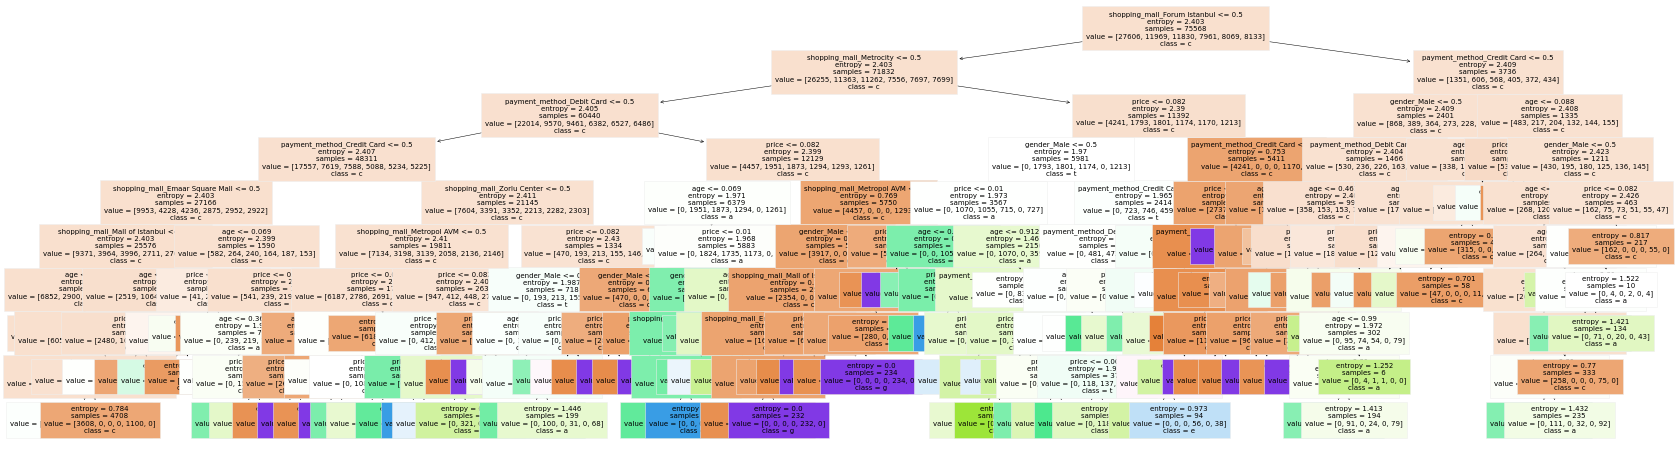

In [32]:
fig, ax = plt.subplots(figsize=(28, 8))

print(f"Profundidad del árbol: {best_tree.get_depth()}")
print(f"Número de nodos terminales: {best_tree.get_n_leaves()}")

plot = plot_tree(decision_tree=best_tree,
                 feature_names=x.columns,
                 class_names='category',
                 filled=True,
                 impurity=True,
                 fontsize=7,
                 ax=ax)

### Naive Bayes

In [ ]:
modelGNB = GaussianNB()
modelBNB = BernoulliNB(binarize=0.5)
modelMNB = MultinomialNB()

In [ ]:
modelGNB.fit(x_train, y_train)
modelBNB.fit(x_train, y_train)
modelMNB.fit(x_train, y_train)

In [ ]:
y_modelGNB = modelGNB.predict(x_test)
y_modelBNB = modelBNB.predict(x_test)
y_modelMNB = modelMNB.predict(x_test)

In [ ]:
print('modelGNB:', metrics.accuracy_score(y_test, y_modelGNB))
print('modelBNB:', metrics.accuracy_score(y_test, y_modelBNB))
print('modelMNB:', metrics.accuracy_score(y_test, y_modelMNB))

### DecisionTreeClassifier

In [ ]:
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
dt = DecisionTreeClassifier(random_state=1234)

In [ ]:
grid_search_tree = GridSearchCV(
    estimator=dt, 
    param_grid=param_grid, 
    cv=5, 
    scoring='accuracy')

In [ ]:
grid_search_tree.fit(x_train, y_train)

In [ ]:
params_dt = grid_search_tree.best_params_
dt_model = grid_search_tree.best_estimator_

In [ ]:

y_pred_dt = dt_model.predict(x_test)

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred_dt)
print("Exactitud del modelo: {:.2f}%".format(accuracy * 100))

* cross validation

In [ ]:
scores_tree = cross_val_score(dt_model, x_train, y_train, cv=5)

In [ ]:
for i, j in enumerate(scores_tree):
    print(f'fold {i+1}: {j}')

In [ ]:
print(f'mean acc: {scores_tree.mean()}')

### Random Forest

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]}

In [ ]:
rf = RandomForestClassifier(random_state=1234)

In [ ]:
grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    cv=5, 
    scoring='accuracy')

In [ ]:
grid_search.fit(x_train, y_train)

In [ ]:
params = grid_search.best_params_
rf_model = grid_search.best_estimator_

In [ ]:
importancia = pd.DataFrame({
    'predictor': x.columns,
    'importancia': rf_model.feature_importances_
})
importancia.sort_values('importancia', ascending=False)

In [ ]:
resultados = pd.DataFrame(grid_search.cv_results_)
resultados = resultados.filter(regex = '(param*|mean_t|std_t)')
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('mean_test_score', ascending=False)
resultados

In [ ]:
print(f'Los mejores parametros para el RandomForest son: {params}')

In [ ]:
y_pred_rf = rf_model.predict(x_test)

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred_rf)
print("Exactitud del modelo: {:.2f}%".format(accuracy * 100))

* Cross validation

In [ ]:
scores = cross_val_score(rf_model, x_train, y_train, cv=5)


In [ ]:
for i, j in enumerate(scores):
    print(f'fold {i+1}: {j}')

In [ ]:
print(f'mean acc: {scores.mean()}')

### AdaBoost

### Gradient Boosting

### Redes neuronales

## Resultados

In [ ]:
modelos = [
    'GaussianNB',
    'MultinomialNB',
    'BernoulliNB',
    'DecisionTreeClassifier',
    'RandomForestClassifier']

sc = [
    metrics.accuracy_score(y_test, y_modelGNB),
    metrics.accuracy_score(y_test, y_modelMNB),
    metrics.accuracy_score(y_test, y_modelBNB),
    metrics.accuracy_score(y_test, y_pred_dt),
    metrics.accuracy_score(y_test, y_pred_rf)]

dic = {'Modelo': modelos, 'Scores': sc}

resultados = pd.DataFrame(dic)
resultados = resultados.sort_values(by='Scores', ascending=False)

resultados